In [22]:
# Useful starting lines
import numpy as np
from helpers import *
from implementations import *
from exploration import *
from process_data import *
from crossvalidation import *
from select_parameter import *

seed=10

# Load the dataset

In [3]:
y, tX, ids = load_csv_data('data/train.csv')
_, tX_test, ids_test = load_csv_data('data/test.csv')

featuresNames = np.genfromtxt('data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

# Data Analysis

per class say how many training examples  there are and how many are -1 or +1

a plot could be useful (you can write this function in exploration.py)

### Distribution Analysis

Jet 0
Number of 1: 25492
Number of -1: 74421


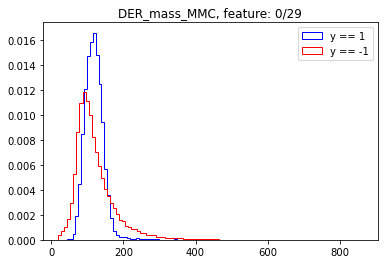

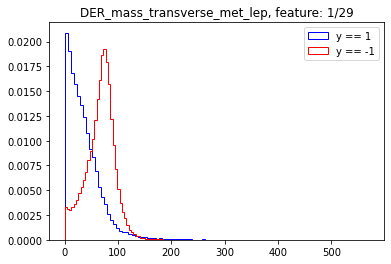

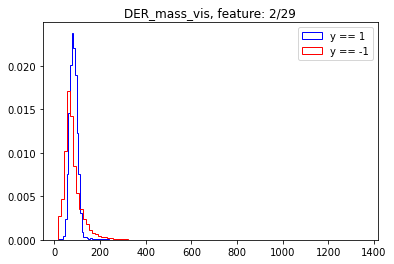

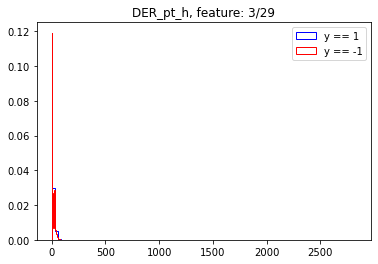

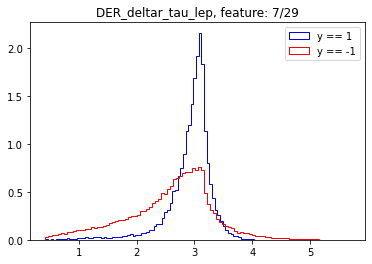

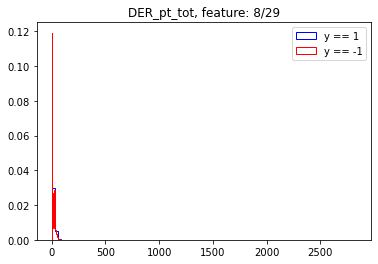

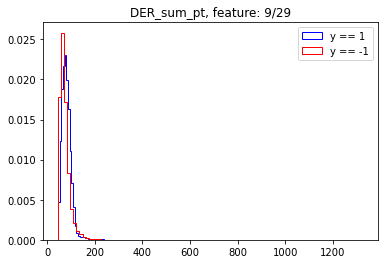

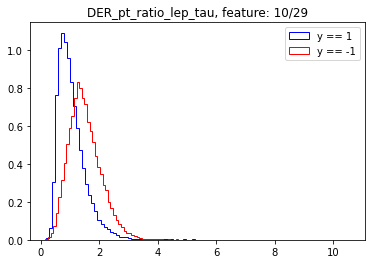

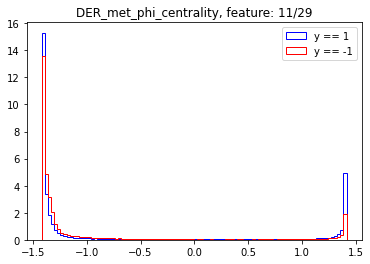

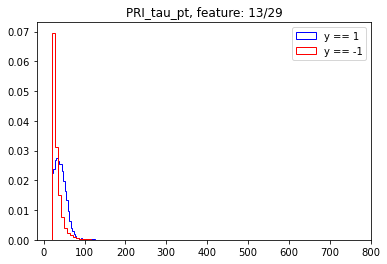

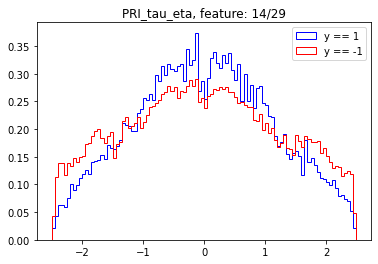

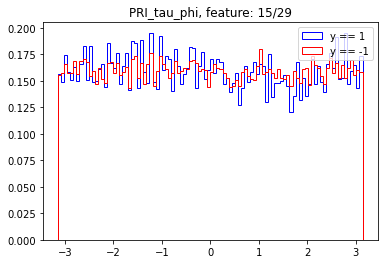

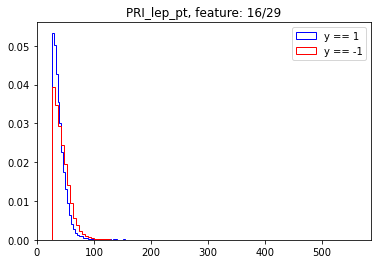

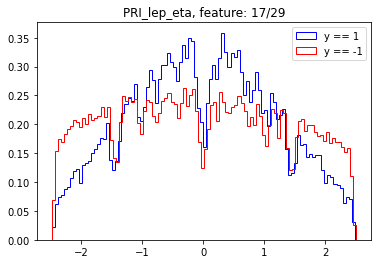

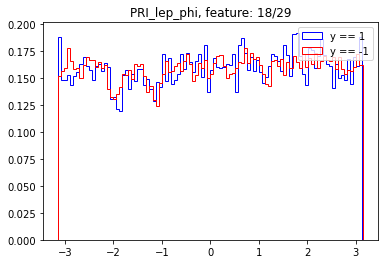

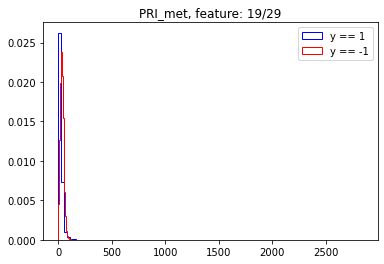

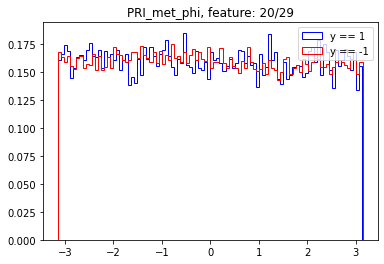

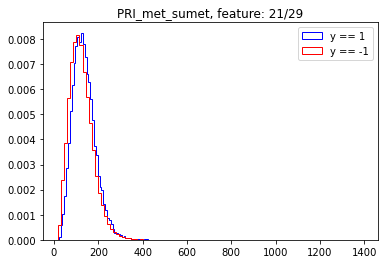

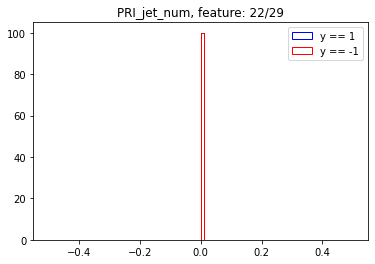

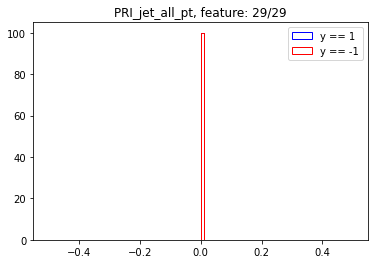

-------------------------------------------
-------------------------------------------
Jet 1
Number of 1: 27710
Number of -1: 49834


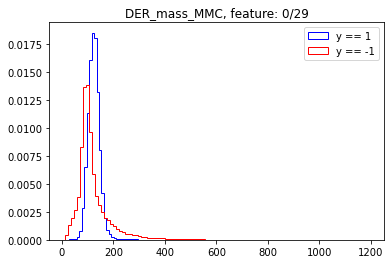

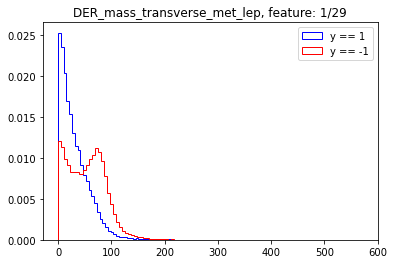

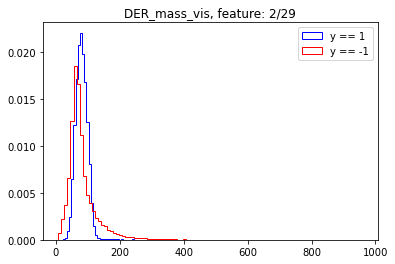

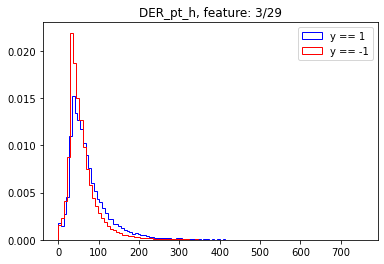

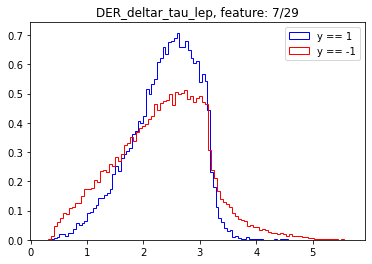

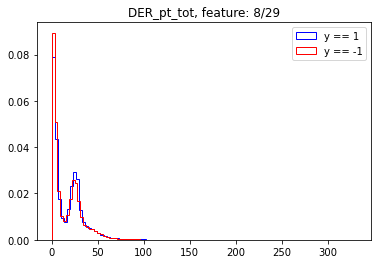

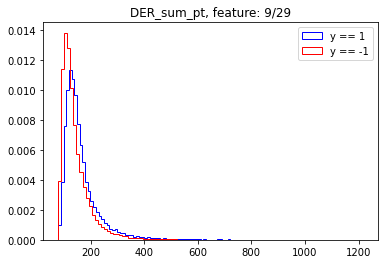

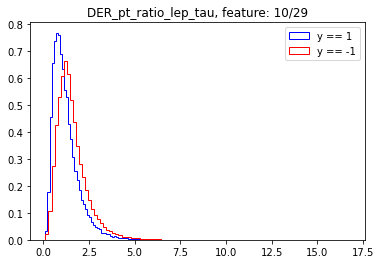

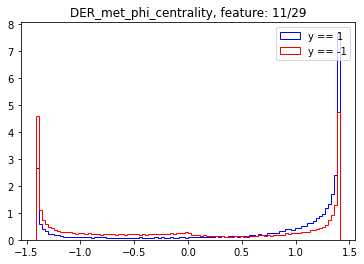

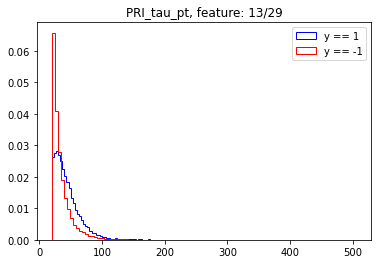

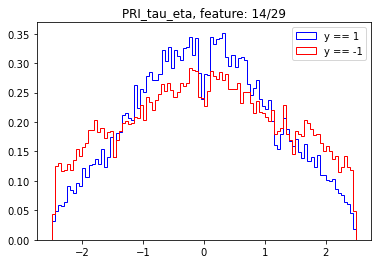

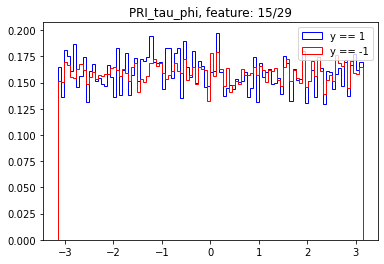

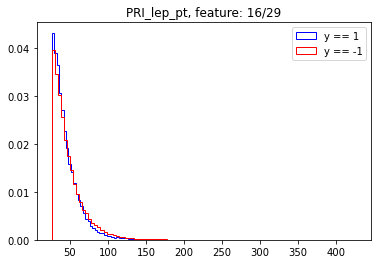

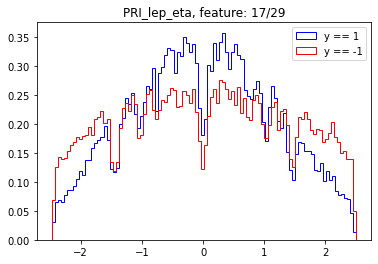

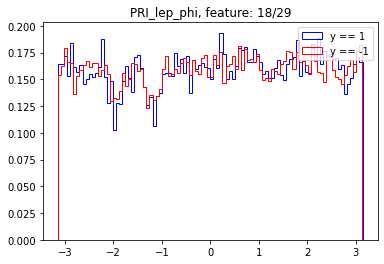

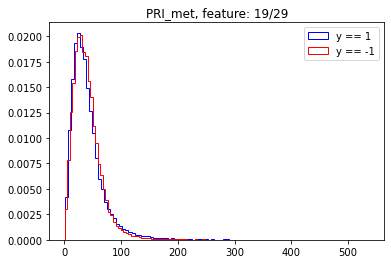

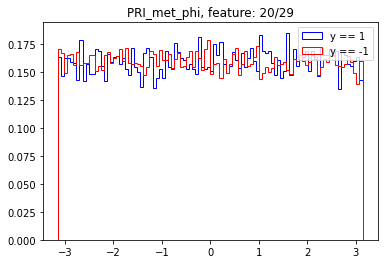

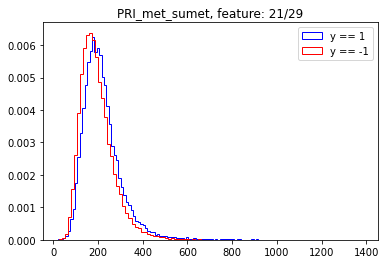

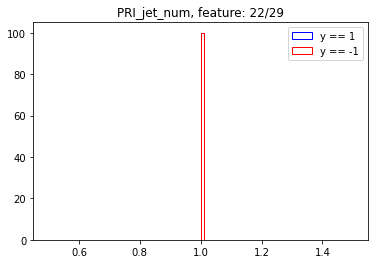

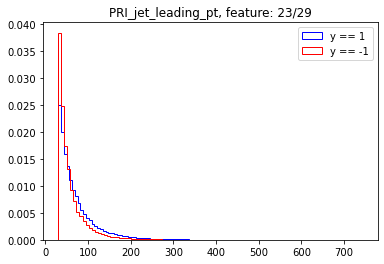

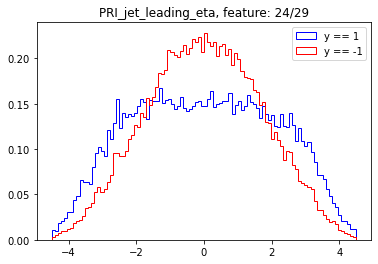

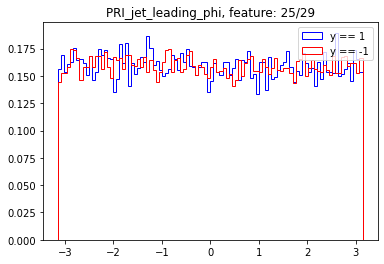

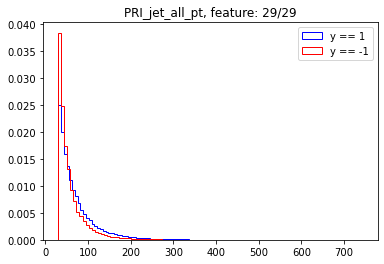

-------------------------------------------
-------------------------------------------
Jet 2
Number of 1: 32465
Number of -1: 40078


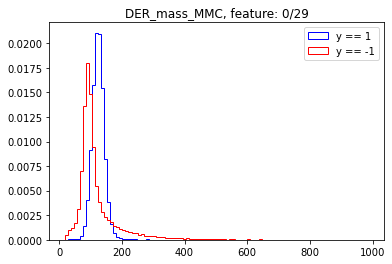

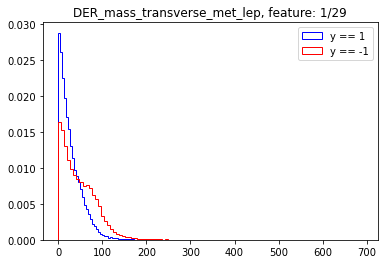

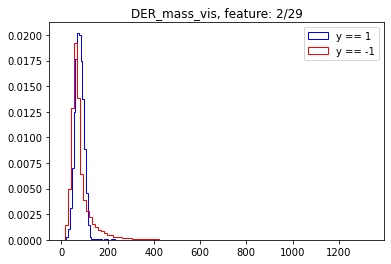

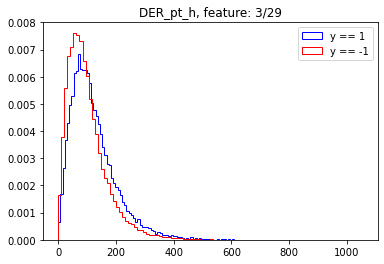

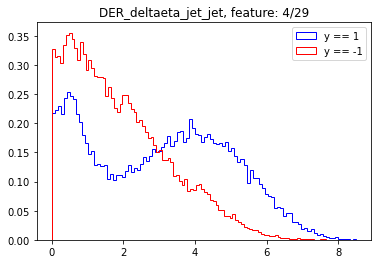

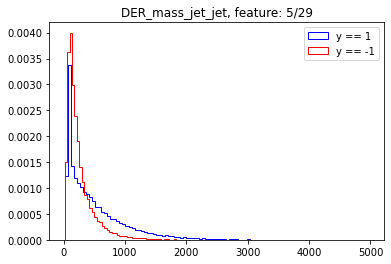

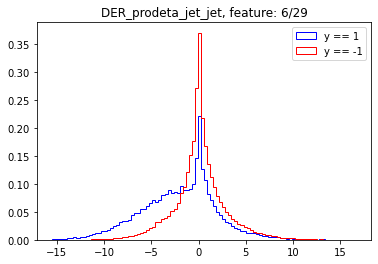

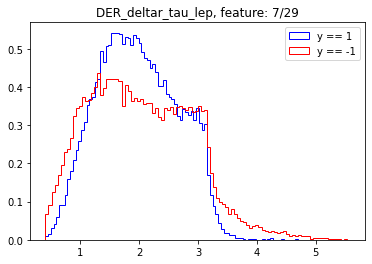

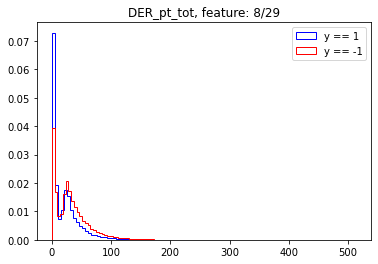

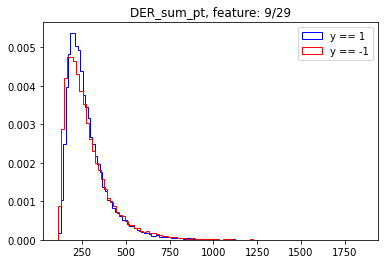

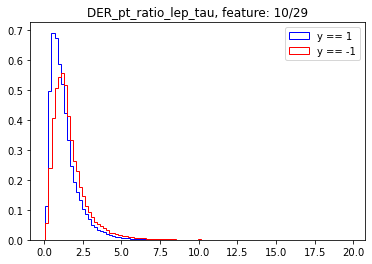

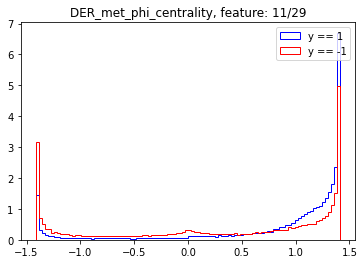

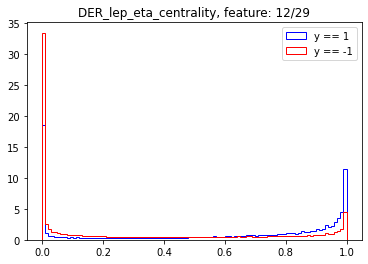

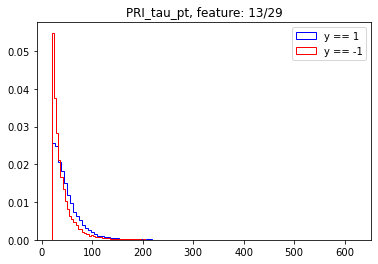

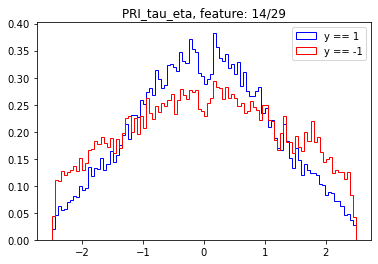

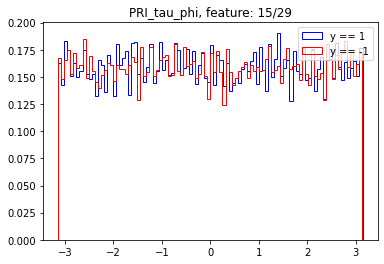

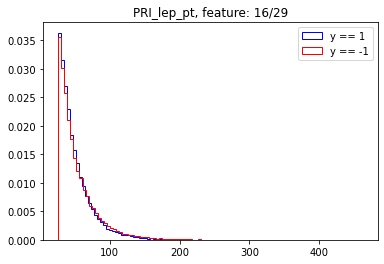

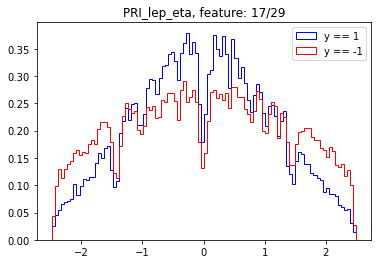

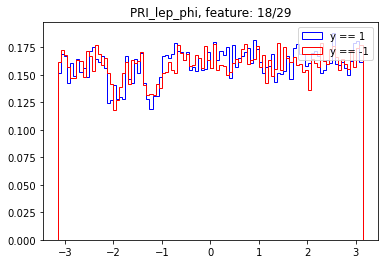

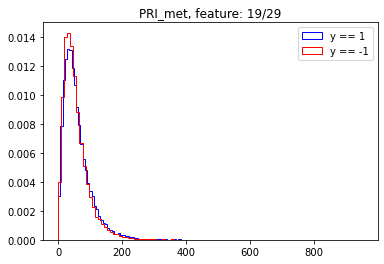

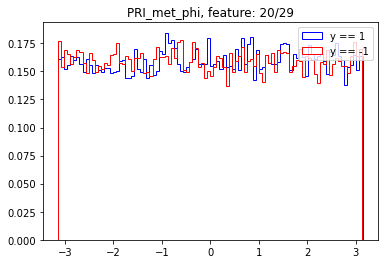

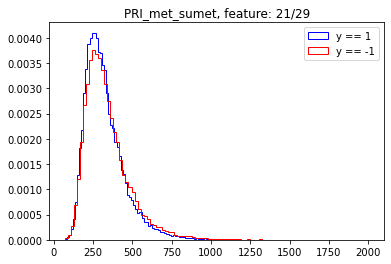

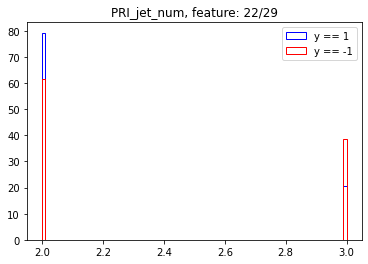

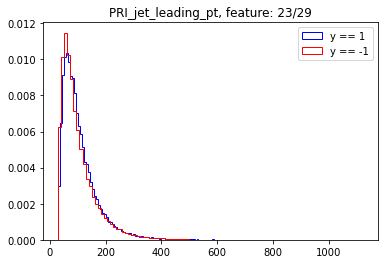

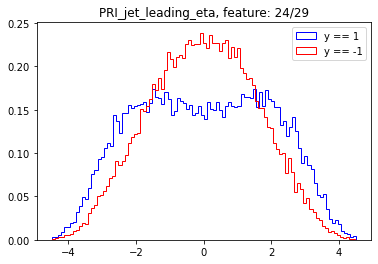

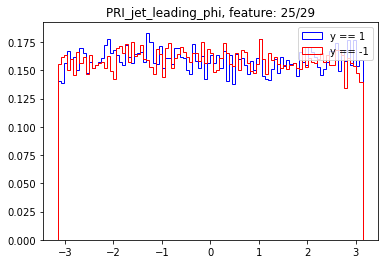

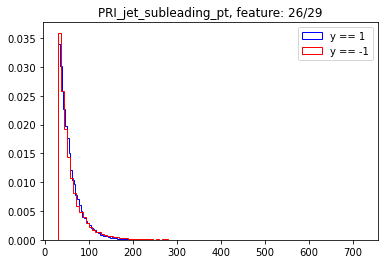

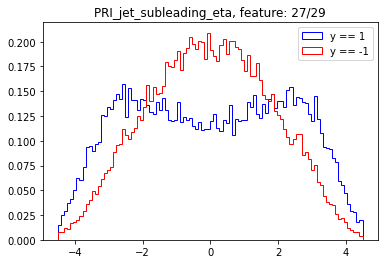

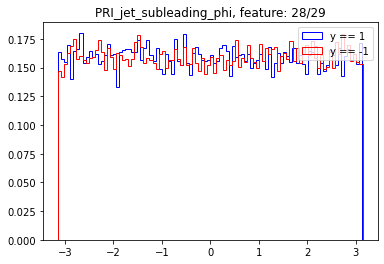

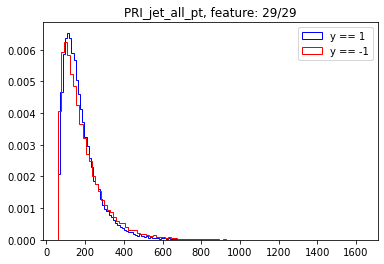

-------------------------------------------
-------------------------------------------


In [4]:
msk_jets_train = get_jet_masks(tX)
for idx in range(len(msk_jets_train)):
        
        y_idx = y[msk_jets_train[idx]]
        x_idx = tX[msk_jets_train[idx],:]
        
        print('Jet',idx)
        print('Number of 1:', list(y_idx).count(1))
        print('Number of -1:', list(y_idx).count(-1))

        distributionsPlot(y_idx, x_idx, featuresNames)

        print('-------------------------------------------')
        print('-------------------------------------------')

## Outlier Analysis

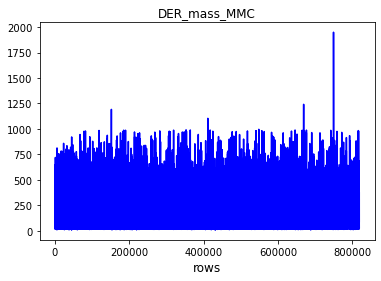

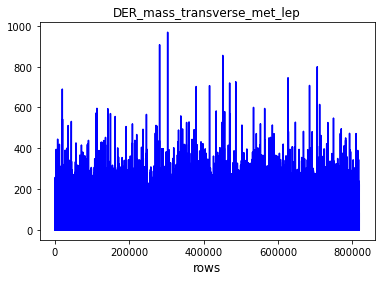

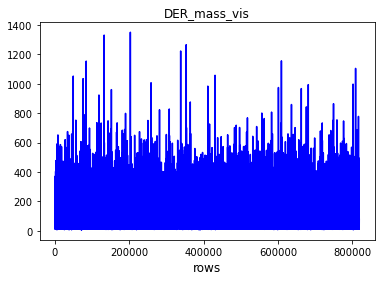

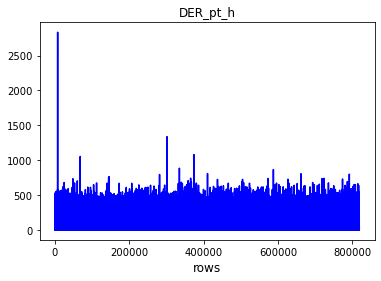

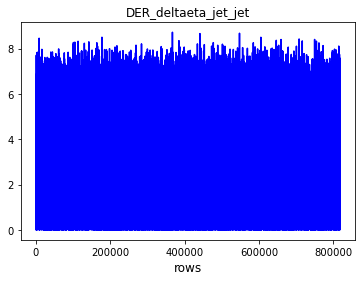

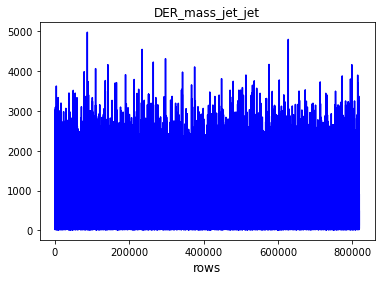

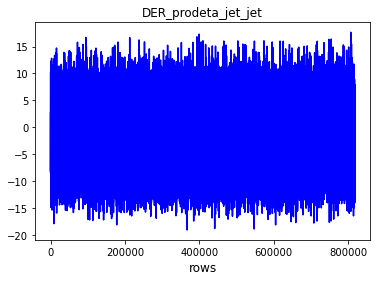

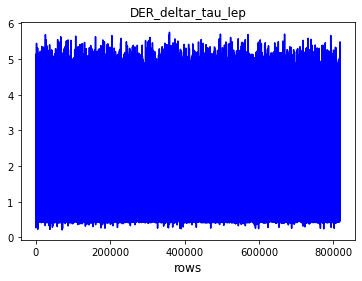

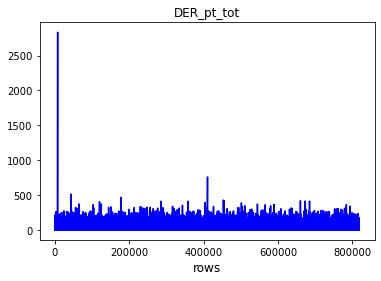

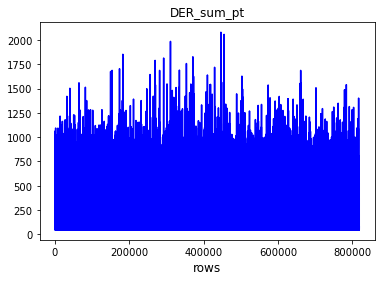

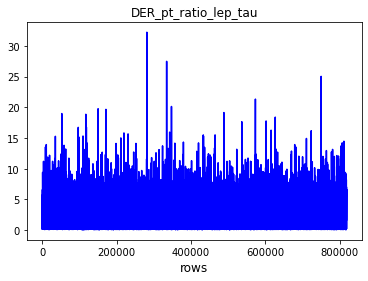

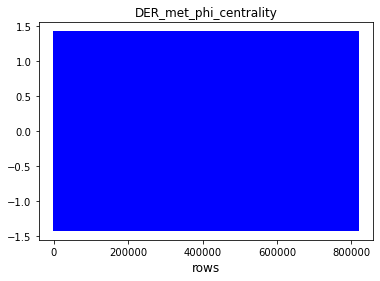

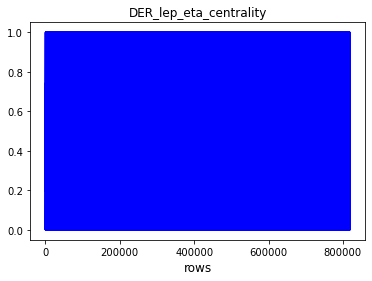

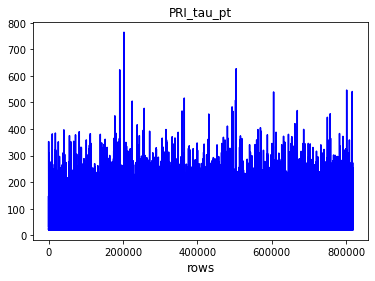

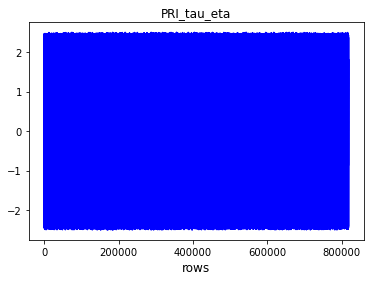

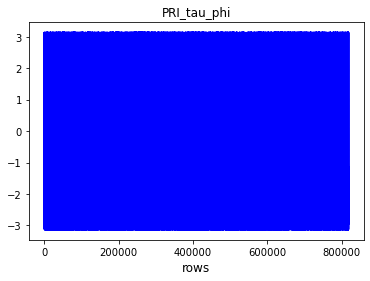

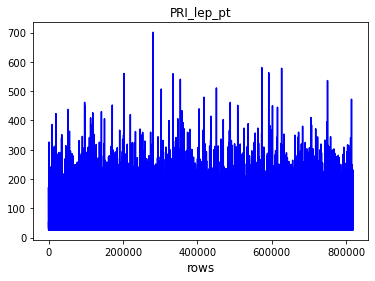

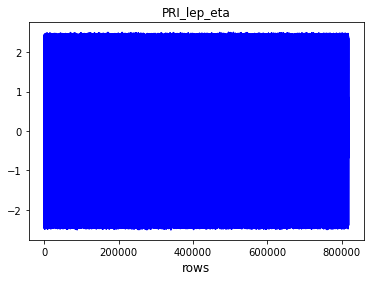

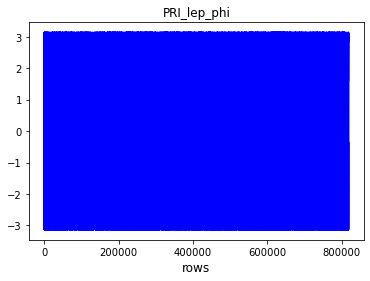

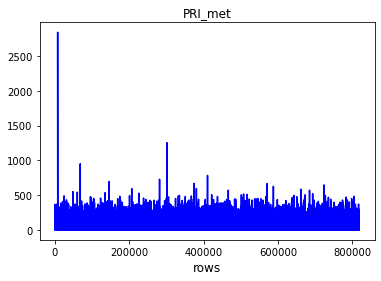

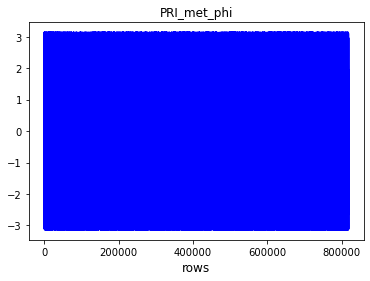

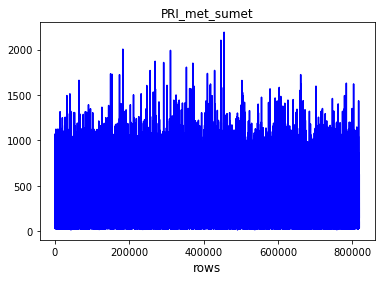

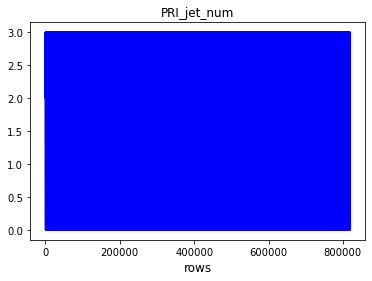

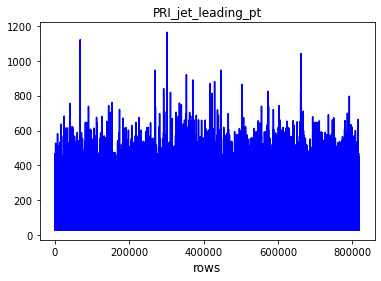

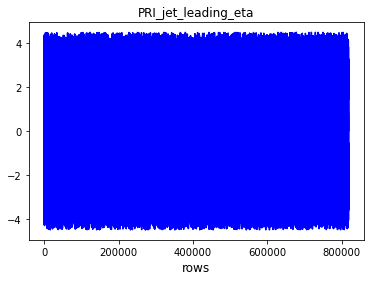

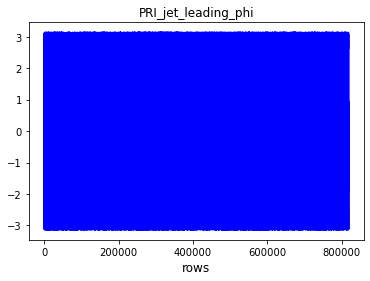

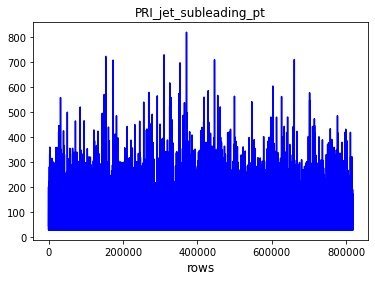

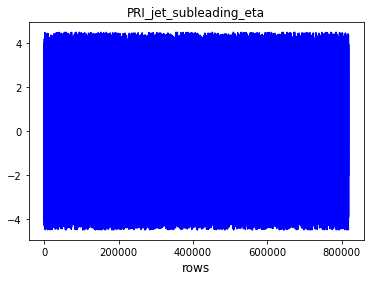

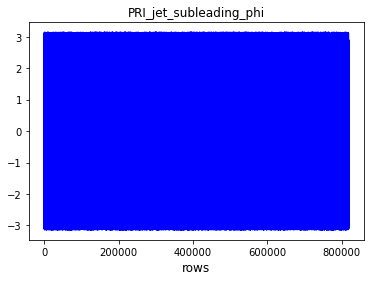

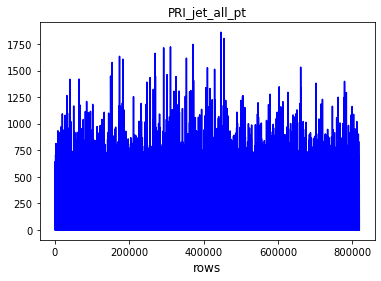

In [5]:
dataset = np.vstack([tX,tX_test])
featuresplot(dataset,featuresNames)

# Methods and Methods

## 1. Least Squares with Gradient Descent

In [6]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]

# Model parameters
max_iters = 500
gamma = 0.00005


# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)

accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, least_squares_GD, k_indices, k, degrees, alphas,
                                           max_iters=max_iters, gamma=gamma)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.785781 / Test accuracy : 0.786507
Iter 1: Training accuracy: 0.786387 / Test accuracy : 0.783651
Iter 2: Training accuracy: 0.785163 / Test accuracy : 0.787023

Average test accuracy: 0.785727
Variance test accuracy: 0.000002


## 2. Least Squares with Stochastic Gradient Descent

In [7]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]

# Model parameters
max_iters = 500
gamma = 0.00001
batch_size=1


# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)

accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, least_squares_SGD, k_indices, k, degrees, alphas, 
                                           max_iters=max_iters, gamma=gamma, batch_size=batch_size)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.739512 / Test accuracy : 0.740200
Iter 1: Training accuracy: 0.734912 / Test accuracy : 0.734392

Average test accuracy: 0.737296
Variance test accuracy: 0.000008


## 3. Least Squares with Normal Equations 

In [8]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]


# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)

accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, least_squares, k_indices, k, degrees, alphas)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.837965 / Test accuracy : 0.825260
Iter 1: Training accuracy: 0.843025 / Test accuracy : 0.841460
Iter 2: Training accuracy: 0.843075 / Test accuracy : 0.824660
Iter 3: Training accuracy: 0.843240 / Test accuracy : 0.840440
Iter 4: Training accuracy: 0.837280 / Test accuracy : 0.830600

Average test accuracy: 0.832484
Variance test accuracy: 0.000052


## 4. Ridge regression with Normal Equations

### Grid Search to find the best parameters (Alpha, Lambda, Degree)  per class_jet

In [9]:
# canditates parameters
degrees_candidates = [4,5,6]
alphas_candidates=[3,4,5,6]
lambdas_candidates = np.logspace(-2,-7,6)

k_fold = 3

opt_degree, opt_lambda, opt_alpha, accu = select_parameters_ridge_regression_jet(y,tX,degrees_candidates,lambdas_candidates,
                                                                  alphas_candidates,k_fold,seed)
print('Optimal alphas per jet_class:',opt_alpha)
print('Optimal degrees per jet_class:',opt_degree)
print('Optimal lambdas per jet_class:',opt_lambda)
print('Maximum accuracy predicted per jet_class:',accu)

Optimal alphas per jet_class: [4.0, 4.0, 5.0]
Optimal degrees per jet_class: [5.0, 5.0, 5.0]
Optimal lambdas per jet_class: [1e-06, 1e-05, 0.001]
Maximum accuracy predicted per jet_class: [0.8509588437825286, 0.8176003301351491, 0.850805729015894]


In [14]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]
lambdas = [1e-06, 1e-05, 1e-03]


# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)

accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, ridge_regression, k_indices, k, degrees, alphas, lambdas)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.843205 / Test accuracy : 0.838920
Iter 1: Training accuracy: 0.842600 / Test accuracy : 0.841640
Iter 2: Training accuracy: 0.843100 / Test accuracy : 0.839000
Iter 3: Training accuracy: 0.843030 / Test accuracy : 0.840740
Iter 4: Training accuracy: 0.842665 / Test accuracy : 0.842580

Average test accuracy: 0.840576
Variance test accuracy: 0.000002


## 5. Logistic Regression with Stochastic Gradient Descent


In [11]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]

# Model parameters
max_iters = 100
gamma = 0.00001
batch_size = 1

# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)


accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, logistic_regression, k_indices, k, degrees, alphas, log=True,
                                           batch_size=batch_size, max_iters=max_iters, gamma=gamma)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.710079 / Test accuracy : 0.709911
Iter 1: Training accuracy: 0.720867 / Test accuracy : 0.719979
Iter 2: Training accuracy: 0.730953 / Test accuracy : 0.733035

Average test accuracy: 0.720975
Variance test accuracy: 0.000090


## 6. Regularized Logistic Regression with Stochastic Gradient Descent

In [16]:
# Preprocessing parameters
degrees = [5, 5, 5]
alphas = [4, 4, 5]

# Model parameters
lambdas=[0.1,0.1,0.1]
max_iters = 100
gamma = 0.00001
batch_size = 1

# Split data in k-fold
k_fold = 5
k_indices = build_k_indices(y, k_fold, seed)


accs_train = []
accs_test = []

for k in range(k_fold):
    acc_train, acc_test = cross_validation_jet(y, tX, reg_logistic_regression, k_indices, k, degrees, alphas, lambdas, log=True,
                                           batch_size=batch_size, max_iters=max_iters, gamma=gamma)
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    
for i in range(len(accs_train)):
    print("Iter %d: Training accuracy: %f / Test accuracy : %f" % (i, accs_train[i], accs_test[i]))

print("\nAverage test accuracy: %f" % np.mean(accs_test))
print("Variance test accuracy: %f" % np.var(accs_test))

Iter 0: Training accuracy: 0.710245 / Test accuracy : 0.710960
Iter 1: Training accuracy: 0.722310 / Test accuracy : 0.720140
Iter 2: Training accuracy: 0.724430 / Test accuracy : 0.720800
Iter 3: Training accuracy: 0.722130 / Test accuracy : 0.722940
Iter 4: Training accuracy: 0.681280 / Test accuracy : 0.680700

Average test accuracy: 0.711108
Variance test accuracy: 0.000248


In [18]:
tX_test.shape

(568238, 30)

# Prediction

In [24]:
! python run.py